In [64]:
import sympy as sym
sym.init_printing()

class Coefficient(sym.Function):
    @classmethod
    def eval(cls, n, m, p, x, y, z, t):
        return None
    
    def _latex(self, printer):
        n, m, p, x, y, z, t = self.args
        return r'C_{%s,%s,%s}' % (printer._print(n), printer._print(m), printer._print(p))

# Full system by individual terms

### Settings

In [65]:
# Dimension order: (x,y,z) for Cartesian, (r,theta,z) for Cylindrical

coordinate_transform = "Cylindrical" # "Cartesian" or "Cylindrical"
enable_spatial_dimensions  = [True, True, True] # Enables spatial dimensions
enable_velocity_dimensions = [True, True, True] # Enables velocity dimensions
enable_E = [True, True, True] # Enables electric field terms
enable_B = [True, True, True] # Enables magnetic field terms
spatially_adaptive_shift = [True, True, True] # Set in spatial dimensions the shift parameter may vary
spatially_adaptive_scale = [True, True, True] # Set in spatial dimensions the scaling parameter may vary

### Definition of full terms

In [66]:
# Define symbols with naming appropriate to coordinate transform
t = sym.Symbol('t')
i, j, k = sym.symbols('i,j,k', integer=True)
q, m = sym.symbols('q, m')
if coordinate_transform == "Cartesian":
    x, y, z = sym.symbols('x, y, z')
    v_x, v_y, v_z = sym.symbols('v_x, v_y, v_z')
    E_x, E_y, E_z = sym.symbols('E_x, E_y, E_z')
    B_x, B_y, B_z = sym.symbols('B_x, B_y, B_z')
    u_x = sym.Function('u_x')(x)
    a_x = sym.Function('a_x')(x)
    u_y = sym.Function('u_y')(y)
    a_y = sym.Function('a_y')(y)
    u_z = sym.Function('u_z')(z)
    a_z = sym.Function('a_z')(z)
elif coordinate_transform == "Cylindrical":
    x, y, z = sym.symbols('r, theta, z')
    v_x, v_y, v_z = sym.symbols('v_r, v_theta, v_z')
    E_x, E_y, E_z = sym.symbols('E_r, E_theta, E_z')
    B_x, B_y, B_z = sym.symbols('B_r, B_theta, B_z')
    u_x = sym.Function('u_r')(x)
    a_x = sym.Function('a_r')(x)
    u_y = sym.Function('u_theta')(y)
    a_y = sym.Function('a_theta')(y)
    u_z = sym.Function('u_z')(z)
    a_z = sym.Function('a_z')(z)

# Define all terms

# df/df, checked CORRECT
dfdt = Coefficient(i, j, k, x, y, z, t).diff(t)

# v_x * df/dx
vx_dfdx = sym.sqrt((i*(i-1)*(i-2))/2) * a_x**2 * a_x.diff(x) * Coefficient(i-3, j, k, x, y, z, t)
vx_dfdx += sym.sqrt(i*(i-1)) * (a_x*u_x*a_x.diff(x) + u_x*a_x.diff(x)*u_x.diff(x) + u_x**2*a_x.diff(x)**2/a_x - u_x*a_x.diff(x)/a_x) * Coefficient(i-2, j, k, x, y, z, t)
vx_dfdx += sym.sqrt(2*i) * ( (2*i+1)/2*a_x**2*a_x.diff(x) + (u_x*a_x.diff(x)-1)*u_x/a_x*u_x.diff(x) + (u_x*a_x.diff(x)-1)*u_x**2/a_x**2*a_x.diff(x) ) * Coefficient(i-1, j, k, x, y, z, t)
vx_dfdx += 1/a_x * ( i*u_x**2*a_x.diff(x)**2 - i*u_x*a_x.diff(x) + i*a_x**2*u_x*a_x.diff(x) + i*u_x*a_x.diff(x)*u_x.diff(x)*a_x - i*u_x.diff(x)*a_x + a_x**2*u_x*a_x.diff(x) + u_x*a_x.diff(x)*u_x.diff(x)*a_x - u_x.diff(x)*a_x + u_x**2*a_x.diff(x)**2 - u_x*a_x.diff(x) ) * Coefficient(i, j, k, x, y, z, t)
vx_dfdx += (i+2) * sym.sqrt((i+1)/2) * a_x**2 * a_x.diff(x) * Coefficient(i+1, j, k, x, y, z, t)
vx_dfdx += sym.sqrt(i/2) * a_x * Coefficient(i-1, j, k, x, y, z, t).diff(x)
vx_dfdx += u_x * Coefficient(i, j, k, x, y, z, t).diff(x)
vx_dfdx += sym.sqrt((i+1)/2) * a_x * Coefficient(i+1, j, k, x, y, z, t).diff(x)

# v_y * df/dy
vy_dfdy = sym.sqrt((j*(j-1)*(j-2))/2) * a_y**2 * a_y.diff(y) * Coefficient(i, j-3, k, x, y, z, t)
vy_dfdy += sym.sqrt(j*(j-1)) * (a_y*u_y*a_y.diff(y) + u_y*a_y.diff(y)*u_y.diff(y) + u_y**2*a_y.diff(y)**2/a_y - u_y*a_y.diff(y)/a_y) * Coefficient(i, j-2, k, x, y, z, t)
vy_dfdy += sym.sqrt(2*j) * ( (2*j+1)/2*a_y**2*a_y.diff(y) + (u_y*a_y.diff(y)-1)*u_y/a_y*u_y.diff(y) + (u_y*a_y.diff(y)-1)*u_y**2/a_y**2*a_y.diff(y) ) * Coefficient(i, j-1, k, x, y, z, t)
vy_dfdy += 1/a_y * ( j*u_y**2*a_y.diff(y)**2 - j*u_y*a_y.diff(y) + j*a_y**2*u_y*a_y.diff(y) + j*u_y*a_y.diff(y)*u_y.diff(y)*a_y - j*u_y.diff(y)*a_y + a_y**2*u_y*a_y.diff(y) + u_y*a_y.diff(y)*u_y.diff(y)*a_y - u_y.diff(y)*a_y + u_y**2*a_y.diff(y)**2 - u_y*a_y.diff(y) ) * Coefficient(i, j, k, x, y, z, t)
vy_dfdy += (j+2) * sym.sqrt((j+1)/2) * a_y**2 * a_y.diff(y) * Coefficient(i, j+1, k, x, y, z, t)
vy_dfdy += sym.sqrt(j/2) * a_y * Coefficient(i, j-1, k, x, y, z, t).diff(y)
vy_dfdy += u_y * Coefficient(i, j, k, x, y, z, t).diff(y)
vy_dfdy += sym.sqrt((j+1)/2) * a_y * Coefficient(i, j+1, k, x, y, z, t).diff(y)

# v_z * df/dz
vz_dfdz = sym.sqrt((k*(k-1)*(k-2))/2) * a_z**2 * a_z.diff(z) * Coefficient(i, j, k-3, x, y, z, t)
vz_dfdz += sym.sqrt(k*(k-1)) * (a_z*u_z*a_z.diff(z) + u_z*a_z.diff(z)*u_z.diff(z) + u_z**2*a_z.diff(z)**2/a_z - u_z*a_z.diff(z)/a_z) * Coefficient(i, j, k-2, x, y, z, t)
vz_dfdz += sym.sqrt(2*k) * ( (2*k+1)/2*a_z**2*a_z.diff(z) + (u_z*a_z.diff(z)-1)*u_z/a_z*u_z.diff(z) + (u_z*a_z.diff(z)-1)*u_z**2/a_z**2*a_z.diff(z) ) * Coefficient(i, j, k-1, x, y, z, t)
vz_dfdz += 1/a_z * ( k*u_z**2*a_z.diff(z)**2 - k*u_z*a_z.diff(z) + k*a_z**2*u_z*a_z.diff(z) + k*u_z*a_z.diff(z)*u_z.diff(z)*a_z - k*u_z.diff(z)*a_z + a_z**2*u_z*a_z.diff(z) + u_z*a_z.diff(z)*u_z.diff(z)*a_z - u_z.diff(z)*a_z + u_z**2*a_z.diff(z)**2 - u_z*a_z.diff(z) ) * Coefficient(i, j, k, x, y, z, t)
vz_dfdz += (k+2) * sym.sqrt((k+1)/2) * a_z**2 * a_z.diff(z) * Coefficient(i, j, k+1, x, y, z, t)
vz_dfdz += sym.sqrt(k/2) * a_z * Coefficient(i, j-1, k, x, y, z, t).diff(z)
vz_dfdz += u_z * Coefficient(i, j, k, x, y, z, t).diff(z)
vz_dfdz += sym.sqrt((k+1)/2) * a_z * Coefficient(i, j, k+1, x, y, z, t).diff(z)

# q/m * dot(E, grad_v(f)), checked CORRECT
Ex_dfdv_x = - q/m * E_x * sym.sqrt(2*i)/a_x * Coefficient(i-1, j, k, x, y, z, t)
Ey_dfdv_y = - q/m * E_y * sym.sqrt(2*j)/a_y * Coefficient(i, j-1, k, x, y, z, t)
Ez_dfdv_z = - q/m * E_z * sym.sqrt(2*k)/a_z * Coefficient(i, j, k-1, x, y, z, t)

# q/m * dot(vxB, grad_v(f)), checked CORRECT
Bz_vy_dfdv_x = -q/m * B_z * sym.sqrt(2*i)/a_x * ( a_y*sym.sqrt((j+1)/2)*Coefficient(i-1, j+1, k, x, y, z, t) + u_y*Coefficient(i-1, j, k, x, y, z, t) + a_y*sym.sqrt(j/2)*Coefficient(i-1, j-1, k, x, y, z, t) )
By_vz_dfdv_x = q/m * B_y * sym.sqrt(2*i)/a_x * ( a_z*sym.sqrt((k+1)/2)*Coefficient(i-1, j, k+1, x, y, z, t) + u_z*Coefficient(i-1, j, k, x, y, z, t) + a_z*sym.sqrt(k/2)*Coefficient(i-1, j, k-1, x, y, z, t) )
Bx_vz_dfdv_y = -q/m * B_x * sym.sqrt(2*j)/a_y * ( a_z*sym.sqrt((k+1)/2)*Coefficient(i, j-1, k+1, x, y, z, t) + u_z*Coefficient(i, j-1, k, x, y, z, t) + a_z*sym.sqrt(k/2)*Coefficient(i, j-1, k-1, x, y, z, t) )
Bz_vx_dfdv_y = q/m * B_z * sym.sqrt(2*j)/a_y * ( a_x*sym.sqrt((i+1)/2)*Coefficient(i+1, j-1, k, x, y, z, t) + u_x*Coefficient(i, j-1, k, x, y, z, t) + a_x*sym.sqrt(i/2)*Coefficient(i-1, j-1, k, x, y, z, t) )
By_vx_dfdv_z = -q/m * B_y * sym.sqrt(2*k)/a_z * ( a_x*sym.sqrt((i+1)/2)*Coefficient(i+1, j, k-1, x, y, z, t) + u_x*Coefficient(i, j, k-1, x, y, z, t) + a_x*sym.sqrt(i/2)*Coefficient(i-1, j, k-1, x, y, z, t) )
Bx_vy_dfdv_z = q/m * B_x * sym.sqrt(2*k)/a_z * ( a_y*sym.sqrt((j+1)/2)*Coefficient(i, j+1, k-1, x, y, z, t) + u_y*Coefficient(i, j, k-1, x, y, z, t) + a_y*sym.sqrt(j/2)*Coefficient(i, j-1, k-1, x, y, z, t) )

# Centripetal acceleration term: 1/x * v_y**2 * df/dv_x
centripetal_term = -1/x * sym.sqrt(2*i)/a_x * ( \
    a_y**2 * sym.sqrt((j+2)*(j+1)) / 2 * Coefficient(i-1, j+2, k, x, y, z, t) \
    + a_y * sym.sqrt((j+1)/2) * Coefficient(i-1, j-1, k, x, y, z, t) \
    + a_y**2 * j/2 * Coefficient(i-1, j, k, x, y, z, t) \
    + u_y * a_y * sym.sqrt((j+1)/2) * Coefficient(i-1, j+1, k, x, y, z, t) \
    + u_y**2 * Coefficient(i-1, j, k, x, y, z, t) \
    + u_y * a_y * sym.sqrt(j/2) * Coefficient(i-1, j-1, k, x, y, z, t) \
    + a_y**2 * (j+1) / 2 * Coefficient(i-1, j, k, x, y, z, t) \
    + a_y * u_y * sym.sqrt(j/2) \
    + a_y**2 * sym.sqrt(j*(j-1)) / 2 * Coefficient(i-1, j-2, k, x, y, z, t) \
)

# Coriolis acceleration term: 1/x * 2*v_x*v_y * df/dv_y
coriolis_term = 2/x * (
    (j+1) * a_x * sym.sqrt((i+1)/2) * Coefficient(i+1, j, k, x, y, z, t) \
    + (j+1) * u_x * Coefficient(i, j, k, x, y, z, t) \
    + (j+1) * a_x * sym.sqrt(i/2) * Coefficient(i-1, j, k, x, y, z, t) \
    + sym.sqrt(j*(i+1)) * u_y/a_y * a_x * Coefficient(i+1, j-1, k, x, y, z, t) \
    + sym.sqrt(2*j) * u_y/a_y * u_x * Coefficient(i, j-1, k, x, y, z, t) \
    + sym.sqrt(i*j) * u_y/a_y * a_x * Coefficient(i-1, j-1, k, x, y, z, t) \
    + sym.sqrt(j*(j-1)) * a_x * sym.sqrt((i+1)/2) * Coefficient(i+1, j-2, k, x, y, z, t) \
    + sym.sqrt(j*(j-1)) * u_x * Coefficient(i, j-2, k, x, y, z, t) \
    + sym.sqrt(j*(j-1)) * a_x * sym.sqrt(i/2) * Coefficient(i-1, j-2, k, x, y, z, t)
)

### LHS assembly & simplification

In [67]:
# Apply dimension simplifications
if not enable_spatial_dimensions[0]: # dfdx = 0
    vx_dfdx = 0
if not enable_spatial_dimensions[1]: # dfdy = 0
    vy_dfdy = 0
if not enable_spatial_dimensions[2]: # dfdz = 0
    vz_dfdz = 0
if not enable_velocity_dimensions[0]: # dfdv_x = 0
    Ex_dfdv_x = 0
    Bz_vy_dfdv_x = 0
    By_vz_dfdv_x = 0
if not enable_velocity_dimensions[1]: # dfdv_y = 0
    Ey_dfdv_y = 0
    Bx_vz_dfdv_y = 0
    Bz_vx_dfdv_y = 0
if not enable_velocity_dimensions[2]: # dfdv_z = 0
    Ez_dfdv_z = 0
    Bx_vy_dfdv_z = 0
    By_vx_dfdv_z = 0
if not enable_E[0]: # Ex = 0
    Ex_dfdv_x = 0
if not enable_E[1]: # Ey = 0
    Ey_dfdv_y = 0
if not enable_E[2]: # Ez = 0
    Ez_dfdv_z = 0
if not enable_B[0]: # Bx = 0
    Bx_vz_dfdv_y = 0
    Bx_vy_dfdv_z = 0
if not enable_B[1]: # By = 0
    By_vz_dfdv_x = 0
    By_vx_dfdv_z = 0
if not enable_B[2]: # Bz = 0
    Bz_vy_dfdv_x = 0
    Bz_vx_dfdv_y = 0

# Assemble LHS
discretized_LHS = dfdt # Time derivative, always present
if coordinate_transform == "Cartesian":
    discretized_LHS += vx_dfdx # x term of v.gradx(f)
    discretized_LHS += vy_dfdy # y term of v.gradx(f)
    discretized_LHS += vz_dfdz # z term of v.gradx(f)
    discretized_LHS += Ex_dfdv_x + Bz_vy_dfdv_x + By_vz_dfdv_x # x term of a.gradv(f)
    discretized_LHS += Ey_dfdv_y + Bx_vz_dfdv_y + Bz_vx_dfdv_y # y term of a.gradv(f)
    discretized_LHS += Ez_dfdv_z + Bx_vy_dfdv_z + By_vx_dfdv_z # z term of a.gradv(f)
elif coordinate_transform == "Cylindrical":
    discretized_LHS += vx_dfdx # Radial term of v.grad(f)
    discretized_LHS += 1/x * vy_dfdy # Azimuthal term of v.grad(f)
    discretized_LHS += vz_dfdz # Axial term of v.grad(f)
    discretized_LHS += Ex_dfdv_x + Bz_vy_dfdv_x + By_vz_dfdv_x + centripetal_term # Radial term of a.gradv(f)
    discretized_LHS += Ey_dfdv_y + Bx_vz_dfdv_y + Bz_vx_dfdv_y + coriolis_term # Azimuthal term of a.gradv(f)
    discretized_LHS += Ez_dfdv_z + Bx_vy_dfdv_z + By_vx_dfdv_z # Axial term of a.gradv(f)
else:
    raise NotImplementedError("Selected coordinate transformation not implemented!")
discretized_LHS = sym.expand(discretized_LHS) # Rewrite equation into as many separate terms as possible

# Apply shift and scaling parameter simplifications
if not spatially_adaptive_shift[0]: discretized_LHS = discretized_LHS.replace(u_x.diff(x), 0) # Shifting parameter constant in 1st dimension
if not spatially_adaptive_shift[1]: discretized_LHS = discretized_LHS.replace(u_y.diff(y), 0) # Shifting parameter constant in 2nd dimension
if not spatially_adaptive_shift[2]: discretized_LHS = discretized_LHS.replace(u_z.diff(z), 0) # Shifting parameter constant in 3rd dimension
if not spatially_adaptive_scale[0]: discretized_LHS = discretized_LHS.replace(a_x.diff(x), 0) # Scaling parameter constant in 1st dimension
if not spatially_adaptive_scale[1]: discretized_LHS = discretized_LHS.replace(a_y.diff(y), 0) # Scaling parameter constant in 2nd dimension
if not spatially_adaptive_scale[2]: discretized_LHS = discretized_LHS.replace(a_z.diff(z), 0) # Scaling parameter constant in 3rd dimension

### Display coefficients of terms

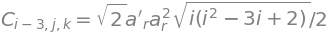

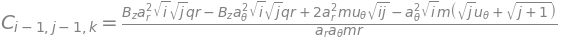

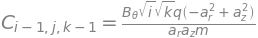

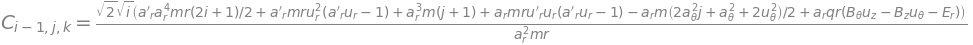

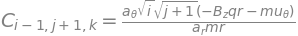

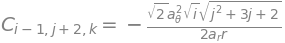

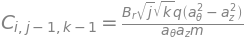

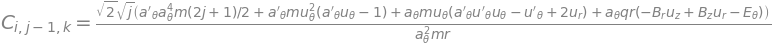

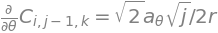

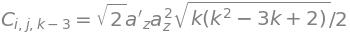

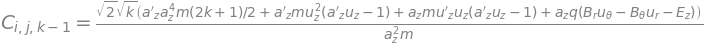

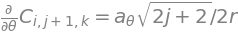

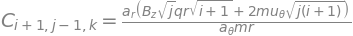

All terms printed!
Total number of terms: 26
Number of coupling terms: 25


In [68]:
# Shorten notation for shift and scaling parameters
if coordinate_transform == "Cartesian":
    discretized_LHS = discretized_LHS.replace(u_x.diff(x), sym.Symbol("u'_x"))
    discretized_LHS = discretized_LHS.replace(u_x, sym.Symbol("u_x"))
    discretized_LHS = discretized_LHS.replace(u_y.diff(y), sym.Symbol("u'_y"))
    discretized_LHS = discretized_LHS.replace(u_y, sym.Symbol("u_y"))
    discretized_LHS = discretized_LHS.replace(u_z.diff(z), sym.Symbol("u'_z"))
    discretized_LHS = discretized_LHS.replace(u_z, sym.Symbol("u_z"))
    discretized_LHS = discretized_LHS.replace(a_x.diff(x), sym.Symbol("a'_x"))
    discretized_LHS = discretized_LHS.replace(a_x, sym.Symbol("a_x"))
    discretized_LHS = discretized_LHS.replace(a_y.diff(y), sym.Symbol("a'_y"))
    discretized_LHS = discretized_LHS.replace(a_y, sym.Symbol("a_y"))
    discretized_LHS = discretized_LHS.replace(a_z.diff(z), sym.Symbol("a'_z"))
    discretized_LHS = discretized_LHS.replace(a_z, sym.Symbol("a_z"))
elif coordinate_transform == "Cylindrical":
    discretized_LHS = discretized_LHS.replace(u_x.diff(x), sym.Symbol("u'_r"))
    discretized_LHS = discretized_LHS.replace(u_x, sym.Symbol("u_r"))
    discretized_LHS = discretized_LHS.replace(u_y.diff(y), sym.Symbol("u'_theta"))
    discretized_LHS = discretized_LHS.replace(u_y, sym.Symbol("u_theta"))
    discretized_LHS = discretized_LHS.replace(u_z.diff(z), sym.Symbol("u'_z"))
    discretized_LHS = discretized_LHS.replace(u_z, sym.Symbol("u_z"))
    discretized_LHS = discretized_LHS.replace(a_x.diff(x), sym.Symbol("a'_r"))
    discretized_LHS = discretized_LHS.replace(a_x, sym.Symbol("a_r"))
    discretized_LHS = discretized_LHS.replace(a_y.diff(y), sym.Symbol("a'_theta"))
    discretized_LHS = discretized_LHS.replace(a_y, sym.Symbol("a_theta"))
    discretized_LHS = discretized_LHS.replace(a_z.diff(z), sym.Symbol("a'_z"))
    discretized_LHS = discretized_LHS.replace(a_z, sym.Symbol("a_z"))


term_counter = 0
coupling_term_counter = 0
for i_off in range(-10, 10):
    for j_off in range(-10, 10):
        for k_off in range(-10, 10):
            C = discretized_LHS.coeff(Coefficient(i+i_off, j+j_off, k+k_off, x, y, z, t)).simplify(doit=False)
            dC_dx = discretized_LHS.coeff(Coefficient(i+i_off, j+j_off, k+k_off, x, y, z, t).diff(x)).simplify(doit=False)
            dC_dy = discretized_LHS.coeff(Coefficient(i+i_off, j+j_off, k+k_off, x, y, z, t).diff(y)).simplify(doit=False)
            dC_dz = discretized_LHS.coeff(Coefficient(i+i_off, j+j_off, k+k_off, x, y, z, t).diff(z)).simplify(doit=False)
            if C != 0: display(sym.Eq(Coefficient(i+i_off, j+j_off, k+k_off, x, y, z, t), C))
            if dC_dx != 0: display(sym.Eq(Coefficient(i+i_off, j+j_off, k+k_off, x, y, z, t).diff(x), dC_dx))
            if dC_dy != 0: display(sym.Eq(Coefficient(i+i_off, j+j_off, k+k_off, x, y, z, t).diff(y), dC_dy))
            if dC_dz != 0: display(sym.Eq(Coefficient(i+i_off, j+j_off, k+k_off, x, y, z, t).diff(z), dC_dz))
            new_terms = (C != 0) + (dC_dx != 0) + (dC_dy != 0) + dC_dz != 0
            term_counter += new_terms
            if not (i==0 and j==0 and k==0): coupling_term_counter += new_terms
print("All terms printed!")
print(f"Total number of terms: {term_counter+1}") # +1 for time derivative
print(f"Number of coupling terms: {coupling_term_counter}")